以下のパラメータでシミュレーションを実行して、hopG = 1 の場合に hopL を増やすと協力率がどの様に変化するかを確認する。

```julia
# ../data/20220505_hopG=1_hopL=1_10.csv

trial_count = 100
agent_count = 10^3
generations = 10^3

network_type_list = [:scale_free_4, :regular_4, :random_4]
weak_selection_list = [true]
calc_payoffs_pattern_list = [1, 2, 3]
hop_game_list = [1]
hop_learning_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b_list = [4.0, 4.5, 5.0, 5.5, 6.0]
μ_list = [0.01]
δ_list = [0.075, 0.125, 0.25, 0.5, 1.0]
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale = 1.5, style = 'darkgrid')

In [2]:
COLUMNS = ['network_type', 'weak_selection', 'calc_pattern', 'hop_game', 'hop_learning', 'b', 'μ', 'δ', 'trial', 'step', 'cooperator_rate']
DTYPES = ['category', 'category', 'category', np.uint8, np.uint8, 'category', 'category', 'category', 'category', int, float]
GROUPBY_COLUMNS = [c for c in COLUMNS if c not in ['weak_selection', 'hop_game', 'trial', 'step', 'cooperator_rate']]

def load_df(csv_file_name: str) -> pd.DataFrame:
    return pd.read_csv(csv_file_name, header=None, names=COLUMNS, dtype={i: x for i, x in enumerate(DTYPES)})

In [3]:
# Load
df = load_df('../data/20220505_hopG=1_hopL=1_10.csv')
print(df.shape)

# Transform
df = df[df.step >= 800].groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': np.mean}).reset_index()
df

(22725000, 11)


,network_type,calc_pattern,hop_learning,b,μ,δ,cooperator_rate
0,random_4,1,1,4.0,0.01,0.075,0.059656
1,random_4,1,1,4.0,0.01,0.125,0.035370
2,random_4,1,1,4.0,0.01,0.25,0.014804
3,random_4,1,1,4.0,0.01,0.5,0.002789
4,random_4,1,1,4.0,0.01,1.0,0.000254
...,...,...,...,...,...,...,...
2245,scale_free_4,2,10,6.0,0.01,0.075,0.717453
2246,scale_free_4,2,10,6.0,0.01,0.125,0.781913
2247,scale_free_4,2,10,6.0,0.01,0.25,0.837951
2248,scale_free_4,2,10,6.0,0.01,0.5,0.874166


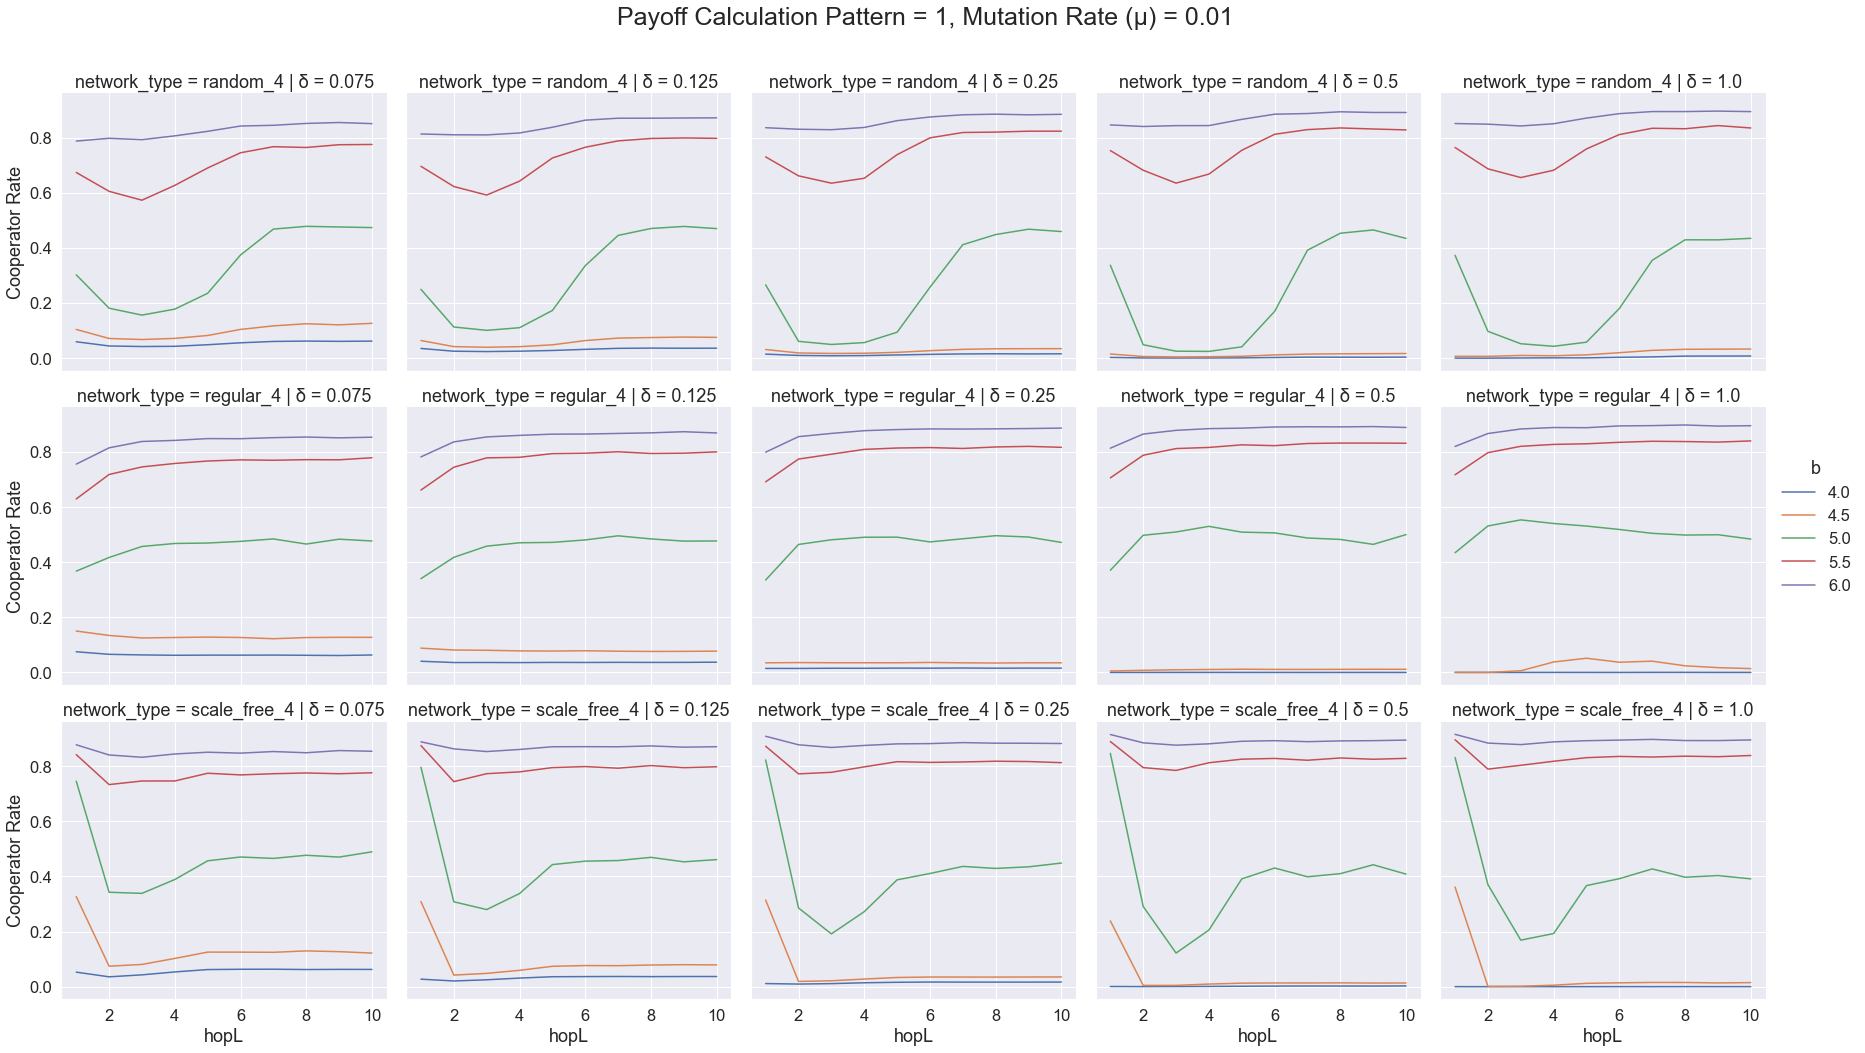

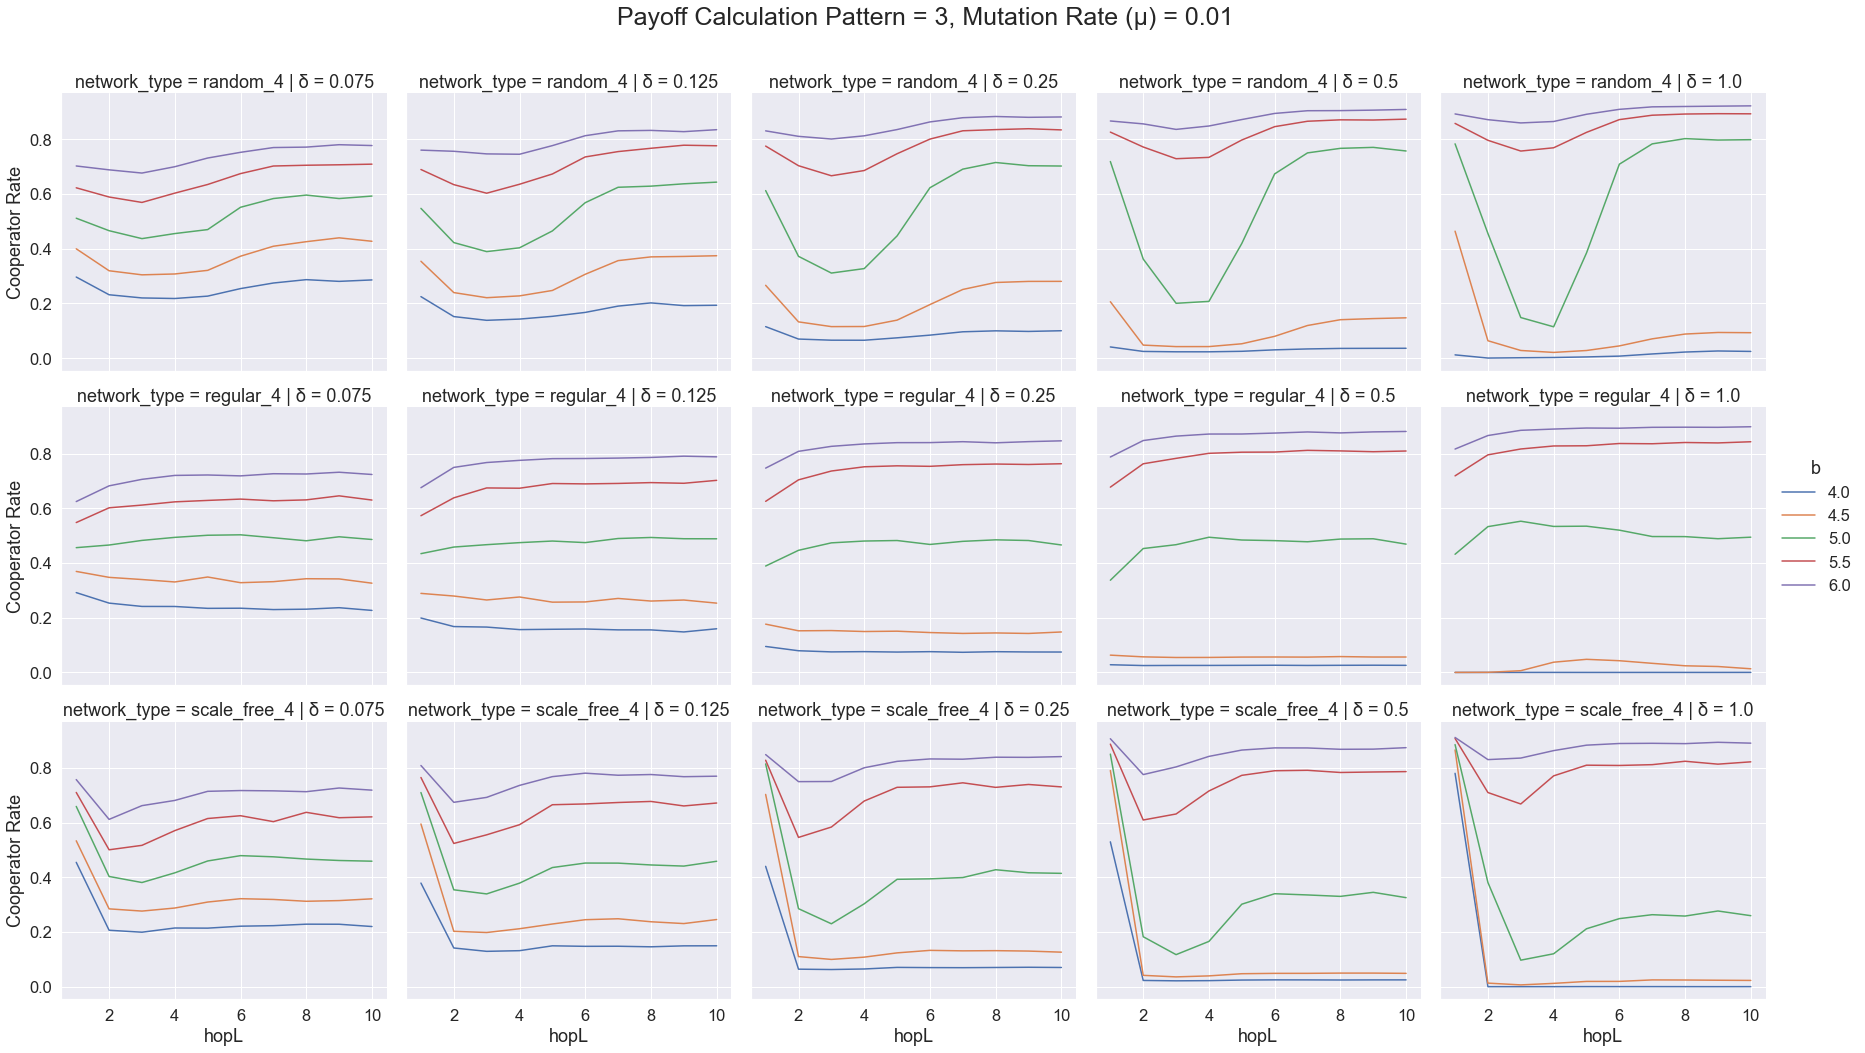

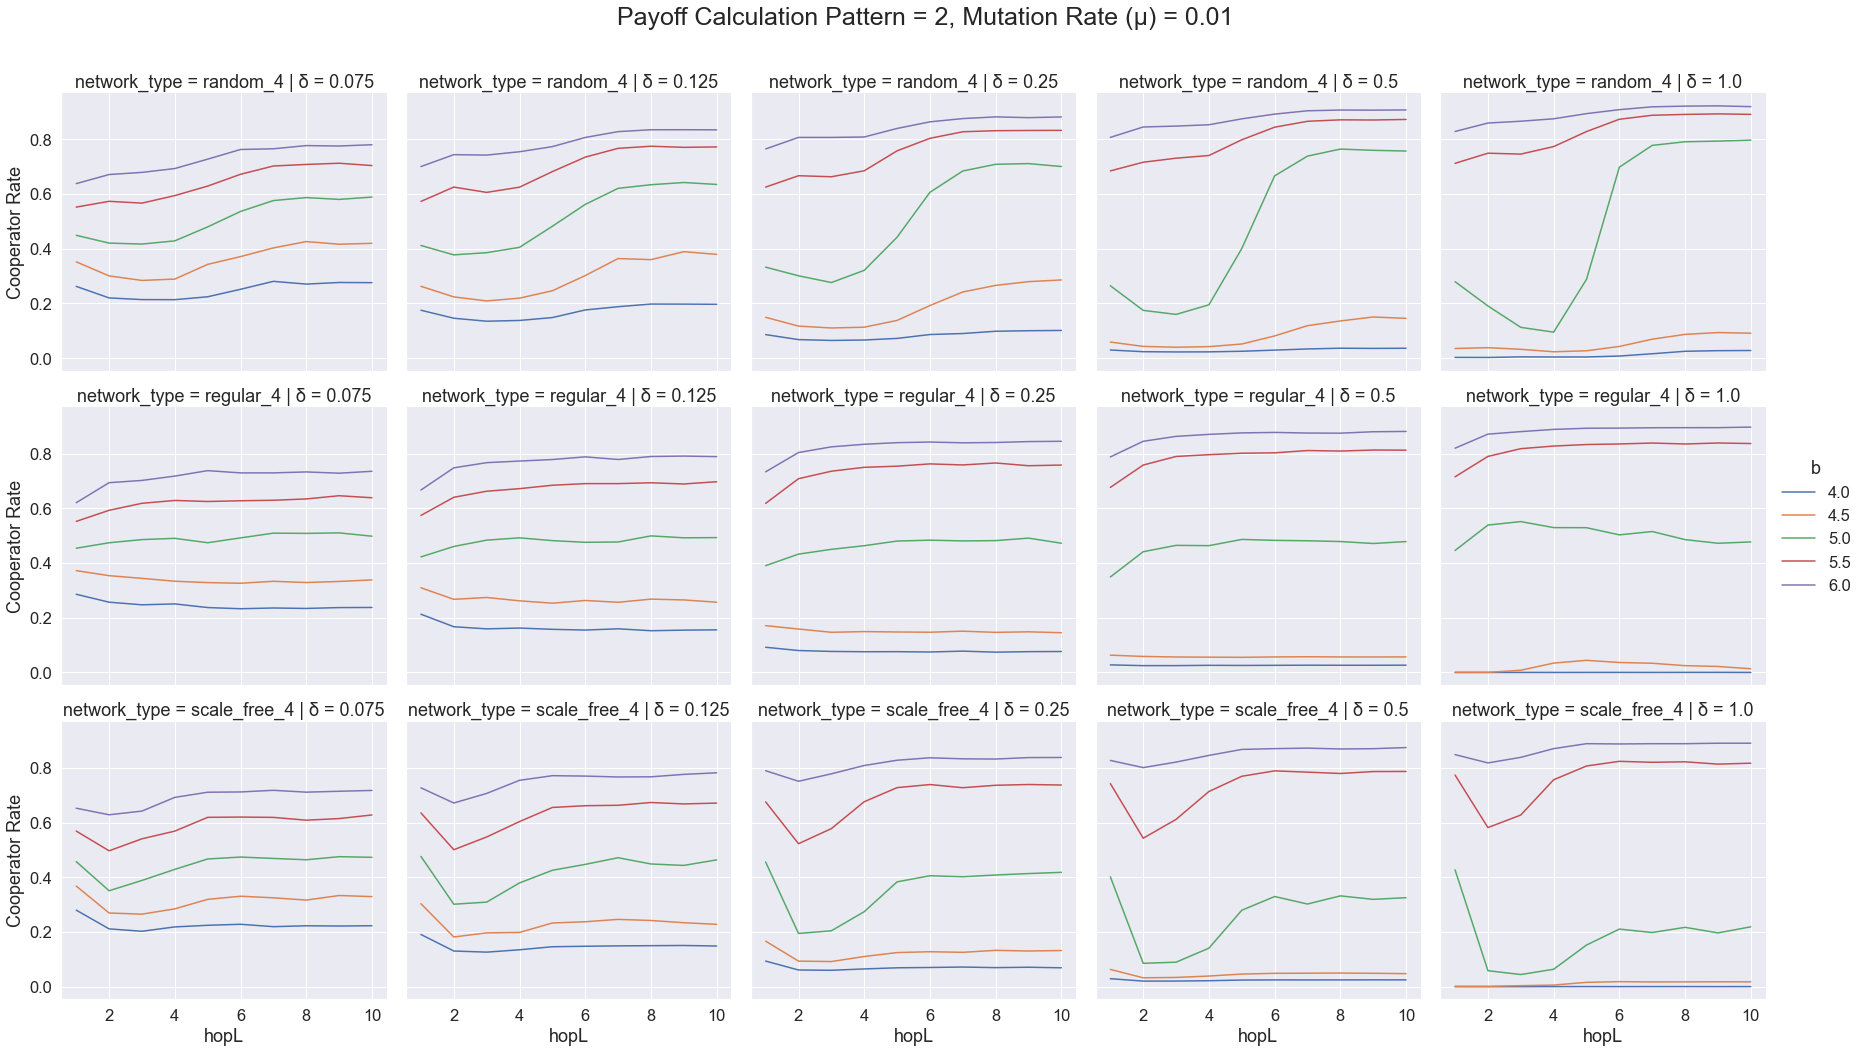

In [4]:
for (_, μ, calc_pattern) in df[['μ', 'calc_pattern']].drop_duplicates().itertuples():
    _df = df[(df.μ == μ) & (df.calc_pattern == calc_pattern)]
    g = sns.relplot(kind='line', x='hop_learning', y='cooperator_rate', hue='b', row='network_type', col='δ', data=_df)
    g.set_axis_labels('hopL', 'Cooperator Rate')
    g.fig.suptitle('Payoff Calculation Pattern = {}, Mutation Rate (μ) = {}'.format(calc_pattern, μ), size=25)
    g.fig.subplots_adjust(top=.9)